

---
**Problem Statement:** Linear regression by using Deep Neural network: Implement Boston housing price
prediction problem by Linear regression using Deep Neural network. Use Boston House price
prediction dataset.


In [6]:
%pip install tensorflow
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the California housing dataset
california_housing = fetch_california_housing()


In [14]:
# Create a DataFrame using Pandas
df = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
df['target'] = california_housing.target  # Add target column

df

NameError: name 'pd' is not defined

In [ ]:
# Split the dataset into features and target
X = california_housing.data
y = california_housing.target



In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the model with additional layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu'),  # Hidden layer 1 with 64 neurons and ReLU activation
    tf.keras.layers.Dense(32, activation='relu'),  # Hidden layer 2 with 32 neurons and ReLU activation
    tf.keras.layers.Dense(1, activation=None)  # Output layer with linear activation
])


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

Epoch 1/20
413/413 [==============================] - 2s 3ms/step - loss: 1.1731 - val_loss: 0.5121
Epoch 2/20
413/413 [==============================] - 1s 4ms/step - loss: 0.4257 - val_loss: 0.4329
Epoch 3/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3817 - val_loss: 0.4197
Epoch 4/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3930 - val_loss: 0.4531
Epoch 5/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3593 - val_loss: 0.3818
Epoch 6/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3486 - val_loss: 0.3746
Epoch 7/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3384 - val_loss: 0.3767
Epoch 8/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3306 - val_loss: 0.3599
Epoch 9/20
413/413 [==============================] - 1s 2ms/step - loss: 0.3471 - val_loss: 0.4236
Epoch 10/20
413/413 [==============================] - 1s 2ms/step - loss: 0.4224 - val_loss: 0.3513

129/129 [==============================] - 0s 1ms/step


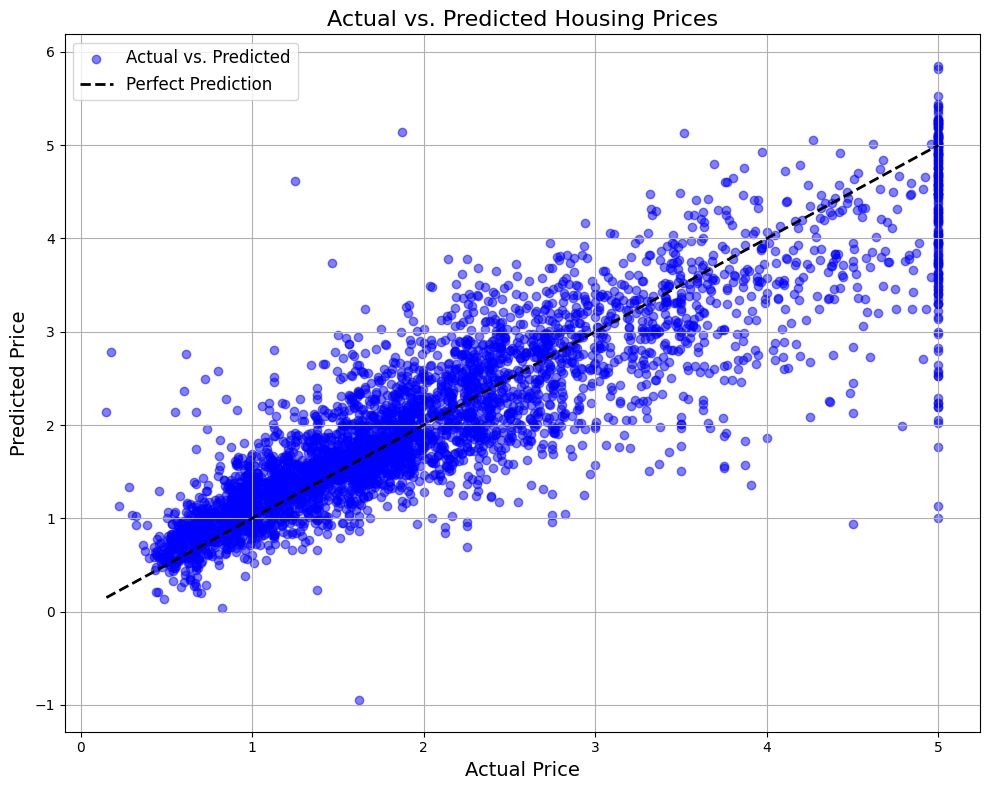

In [ ]:
# Predict on test data
y_pred = model.predict(X_test).flatten()

# Plot actual vs. predicted
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.title('Actual vs. Predicted Housing Prices', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()